In [77]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_housing_data():    
    tarball_path = Path("datasets/housing.tgz") # define path
    if not tarball_path.is_file():  # make "dataset" directory
        Path("datasets").mkdir(parents=True, exist_ok=True)

    url = "https://github.com/ageron/data/raw/main/housing.tgz" # datset url
    urllib.request.urlretrieve(url, tarball_path)
    with tarfile.open(tarball_path) as housing_tarball: # housing.tgz open
            housing_tarball.extractall(path="datasets") # "dataset" dir에 파일들 추출
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()

In [78]:
housing = load_housing_data()
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [79]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [80]:
# null값 확인
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [81]:
housing.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [82]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


c:\Users\user\anaconda3\envs\handsOn\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


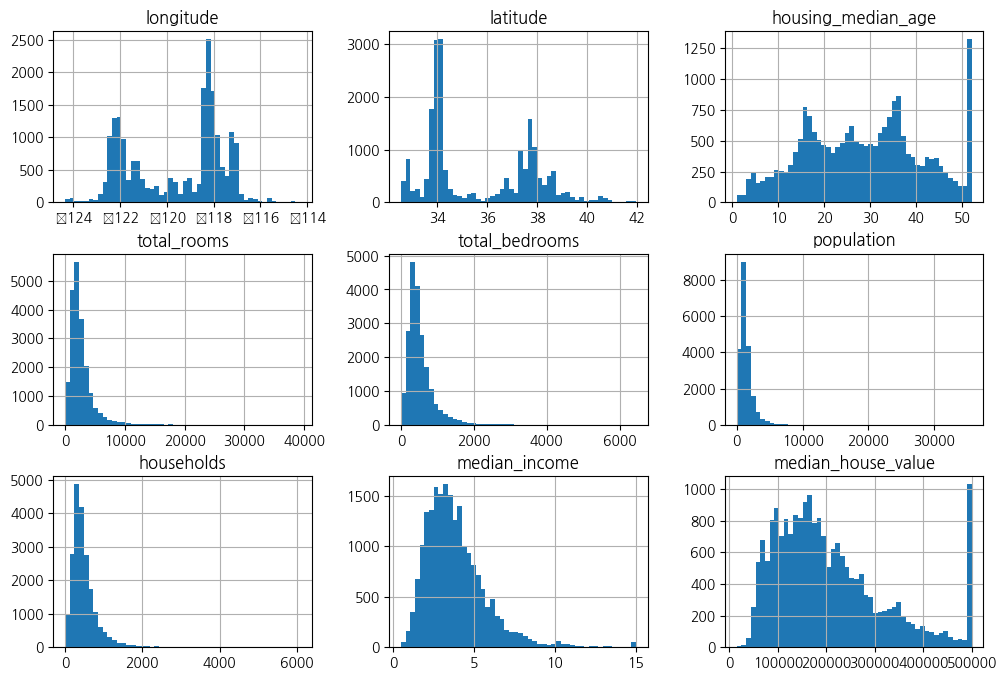

In [83]:
import matplotlib.pyplot as plt

housing.hist(bins=50, figsize=(12, 8))
plt.show()

- median_income: scale 조정된 값(상/하한 설정됨: 0.5~15, 3->30,000달러)
- houseing_median_age, median_house_value: 최대/최솟값 한정됨
- median_house_value를 에측할 때, 50,000이 넘는 값을 예측 못할 것으로 예상됨
- faeture의 scale이 매우 다름 -> 스켈링링 필요해보임
- 많은 feature이 오른쪽 꼬리가 긴 형태, 이런 패턴은 모델이 패턴을 찾기 어렵게 함 -> 정규화 필요?

### Test data 생성

In [84]:
import numpy as np 
np.random.seed(42)

def shuffle_and_split_data(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data)) # data 개수만큼 무작위 배열 생성
    test_set_size = int(len(data) * test_ratio)    # test_data 개수 define
    test_indices = shuffled_indices[:test_set_size] 
    train_indices = shuffled_indices[test_set_size:]

    return data.iloc[train_indices], data.iloc[test_indices]

In [85]:
train_set, test_set = shuffle_and_split_data(data=housing, test_ratio=0.2)
print(f'train: {len(train_set)}, test: {len(test_set)}')

train: 16512, test: 4128


##### 각 샘플마다 식별자의 해시값을 계산해, 해시 최대값의 20%보다 작거나 같은 샘플만 테스트 샘플로 보내는 방법
##### 유지보수 용이

In [86]:
from zlib import crc32

def is_id_in_test_set(identifier, test_ratio):
    return crc32(np.int64(identifier)) < test_ratio * 2**32   

def split_data_with_id_hash(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: is_id_in_test_set(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [87]:
housing_with_id = housing.reset_index() 
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "index")

In [88]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "id")

#### sklearn을 이용한 방법

In [89]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

- 데이터가 충분히 크지 않다면,샘플링 편향이 생길 가능성 큼.
- ex) 전화번호부에서 1,000명을 랜덤으로 뽑을 대, 남/여 비율이 51/49라면, test set에서도 비슷한 비율을 유지해야 함

##### 편향을 고려한 방법

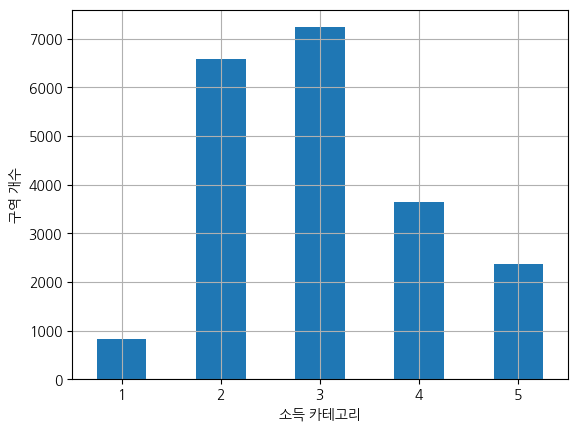

In [90]:
# 소득 카테고리 5개 생성 (1~5)
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

# visualize
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("소득 카테고리")
plt.ylabel("구역 개수")
plt.show()
# plt.rc("font", family="NanumBarunGothic")

In [91]:
# sklearn을 이용한 방법
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
start_splits = []
for train_index, test_index in splitter.split(housing, housing["income_cat"]):
    start_train_set_n = housing.iloc[train_index]
    start_test_set_n = housing.iloc[test_index]
    start_splits.append([start_train_set_n, start_test_set_n])

In [92]:
start_train_set, start_test_set_n = start_splits[0]
start_splits[0]

[       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
 13096    -122.42     37.80                52.0       3321.0          1115.0   
 14973    -118.38     34.14                40.0       1965.0           354.0   
 3785     -121.98     38.36                33.0       1083.0           217.0   
 14689    -117.11     33.75                17.0       4174.0           851.0   
 20507    -118.15     33.77                36.0       4366.0          1211.0   
 ...          ...       ...                 ...          ...             ...   
 14207    -118.40     33.86                41.0       2237.0           597.0   
 13105    -119.31     36.32                23.0       2945.0           592.0   
 19301    -117.06     32.59                13.0       3920.0           775.0   
 19121    -118.40     34.06                37.0       3781.0           873.0   
 19888    -122.41     37.66                44.0        431.0           195.0   
 
        population  households  median

In [93]:
# train_test_split()에서도 stratify 파라미터를 사용해 간편하게 사용 가능
start_train_set, strat_test_set = train_test_split(housing,
                                                   test_size=0.2,
                                                   stratify=housing["income_cat"],
                                                   random_state=42)

print(strat_test_set["income_cat"].value_counts() / len(strat_test_set))

# 계층적 샘플링을 사용해 만든 test set은 전체 데이터셋에 있는 비율과 거의 같음

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64


In [94]:
for set_ in (start_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

### 2.4 데이터 이해를 위한 탐색과 시각화

In [95]:
# 원본 데이터 보존을 하기 위한 복사사
housing = start_train_set.copy()

c:\Users\user\anaconda3\envs\handsOn\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


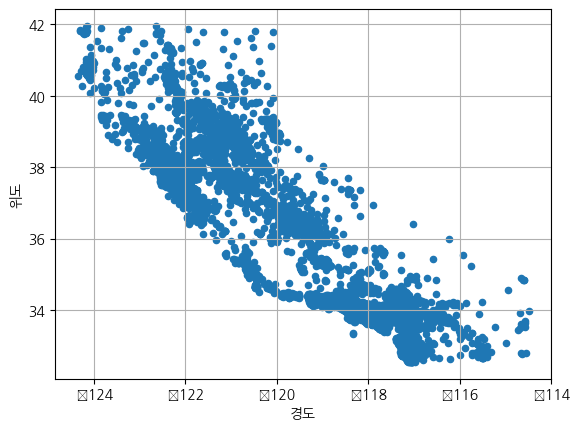

In [96]:
# 위,경도 데이터 시각화
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True)
plt.xlabel("경도")
plt.ylabel("위도")
plt.show()

c:\Users\user\anaconda3\envs\handsOn\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


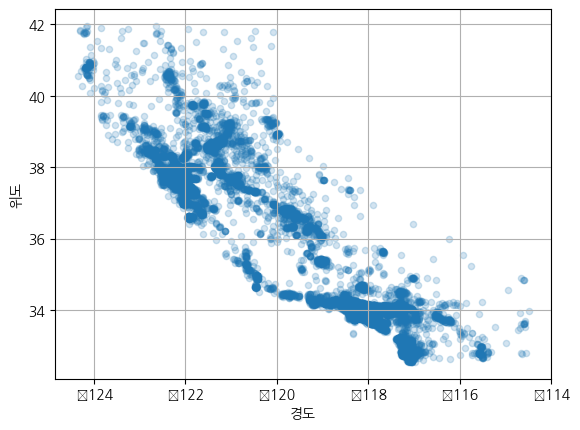

In [97]:
# alpha(투명도)값 조절을 통한 밀집도 고려 시각화
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.2)
plt.xlabel("경도")
plt.ylabel("위도")
plt.show()

c:\Users\user\anaconda3\envs\handsOn\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


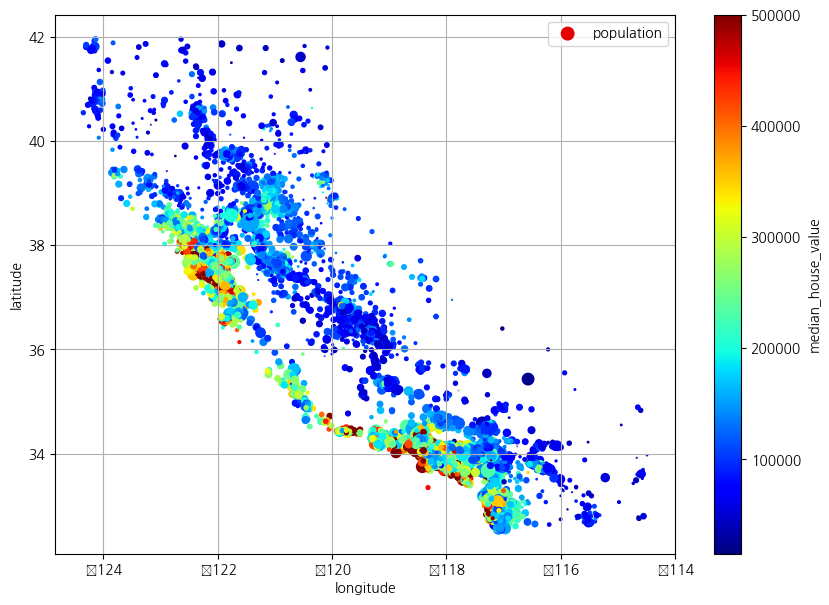

In [98]:
# 인구: 원의 반지름(s), 가격: 색상(c)
# 인구: 원의 반지름(s), 가격: 색상(c)
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True,  # 경도와 위도를 사용하여 산점도 그리기
                   s=housing["population"] / 100, label="population",  # 인구 수에 따라 원의 크기 설정
                   c="median_house_value", cmap="jet", colorbar=True,  # 주택 중간 가격에 따라 색상 설정
                   legend=True, sharex=False, figsize=(10, 7))
plt.show()

#### 2.4.2 상관관계 조사하기

In [99]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924213,-0.102937,0.044558,0.068210,0.104236,0.054261,-0.016542,-0.050859
latitude,-0.924213,1.000000,0.005692,-0.036753,-0.066391,-0.115677,-0.071604,-0.078137,-0.139584
housing_median_age,-0.102937,0.005692,1.000000,-0.361710,-0.317978,-0.301906,-0.300075,-0.127043,0.102175
total_rooms,0.044558,-0.036753,-0.361710,1.000000,0.930076,0.863967,0.916143,0.197720,0.137455
total_bedrooms,0.068210,-0.066391,-0.317978,0.930076,1.000000,0.886200,0.978822,-0.006038,0.054635
population,0.104236,-0.115677,-0.301906,0.863967,0.886200,1.000000,0.916237,0.004282,-0.020153
households,0.054261,-0.071604,-0.300075,0.916143,0.978822,0.916237,1.000000,0.013637,0.071426
median_income,-0.016542,-0.078137,-0.127043,0.197720,-0.006038,0.004282,0.013637,1.000000,0.688380
median_house_value,-0.050859,-0.139584,0.102175,0.137455,0.054635,-0.020153,0.071426,0.688380,1.000000


In [100]:
print(corr_matrix["median_house_value"] .sort_values(ascending=False))
# 해석
# 중간소득이 높을수록 집값도 높음
# 위도가 높을수록 집값이 내려가는 경향 있음

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64


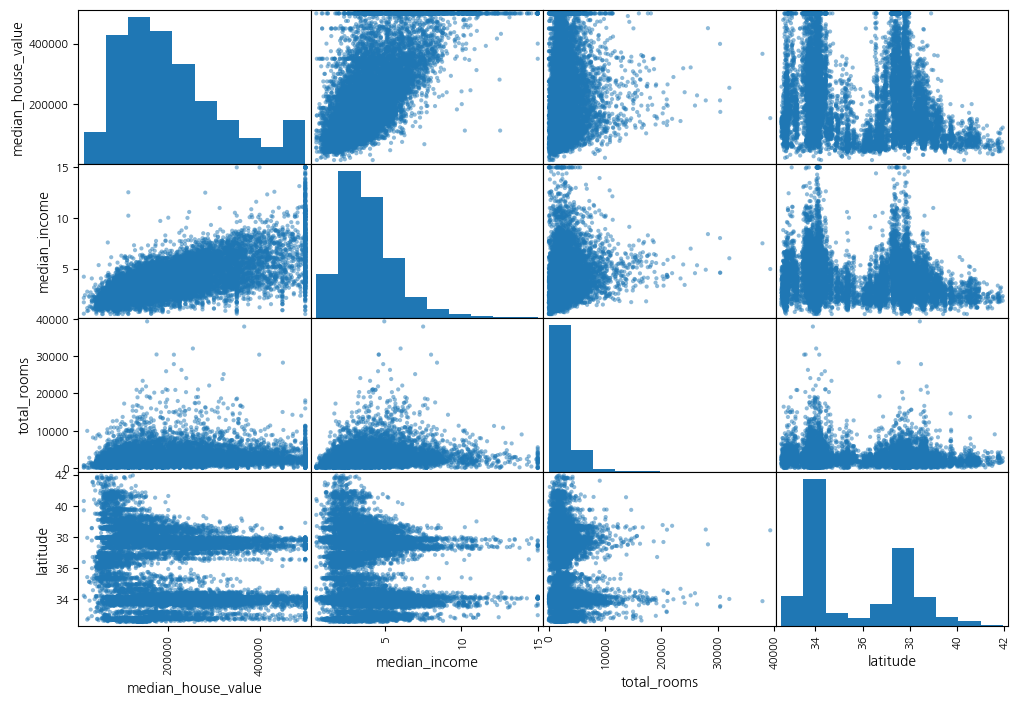

In [101]:
from pandas.plotting import scatter_matrix

# 상관관계가 높아보이는 feature들만 scatter visualize
attributes = ["median_house_value", "median_income", "total_rooms", "latitude"]
scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()

In [102]:
import matplotlib.font_manager as fm

# 한글 폰트 설정
font_path = 'C:/Windows/Fonts/NanumGothic.ttf'  # 폰트 파일 경로
fontprop = fm.FontProperties(fname=font_path, size=12)
plt.rc('font', family=fontprop.get_name())

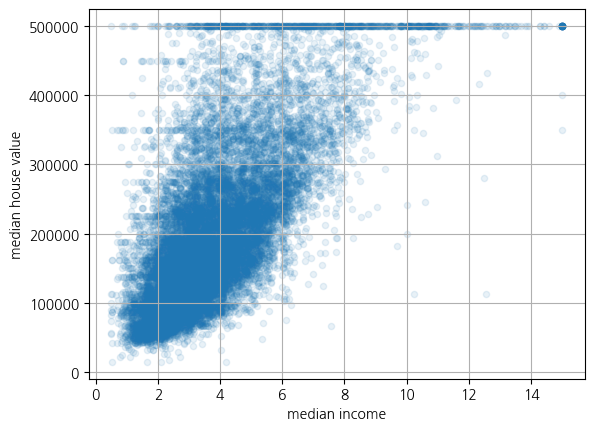

In [103]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
                   alpha=0.1, grid=True)
plt.xlabel("median income")
plt.ylabel("median house value")
plt.show()
# 해석:
# 1. 상관관계가 매우 강함
# 2. 가격 한계값이 수평선으로 보임, 제거 대상

#### 2.4.3 특성 조합으로 실험하기

In [104]:
# print(housing.columns)
# housing.drop(columns=["rooms_for_house", "rooms_por_house"], inplace=True)
# print(housing.columns)

In [105]:
# 의미없는 특성 -> 파생변수 생성
# 특정 구역의 방 개수 -> 가구당 방 개수
# 특정 구역의 침실 개수 -> 가구당 침대 개수
# 가구당 인원(좋을까?)
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"]
housing["bedroom_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["population_per_house"] = housing["population"] / housing["households"]
print(housing.columns)

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'rooms_per_house',
       'bedroom_ratio', 'population_per_house'],
      dtype='object')


In [106]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value      1.000000
median_income           0.688380
rooms_per_house         0.143663
total_rooms             0.137455
housing_median_age      0.102175
households              0.071426
total_bedrooms          0.054635
population             -0.020153
population_per_house   -0.038224
longitude              -0.050859
latitude               -0.139584
bedroom_ratio          -0.256397
Name: median_house_value, dtype: float64

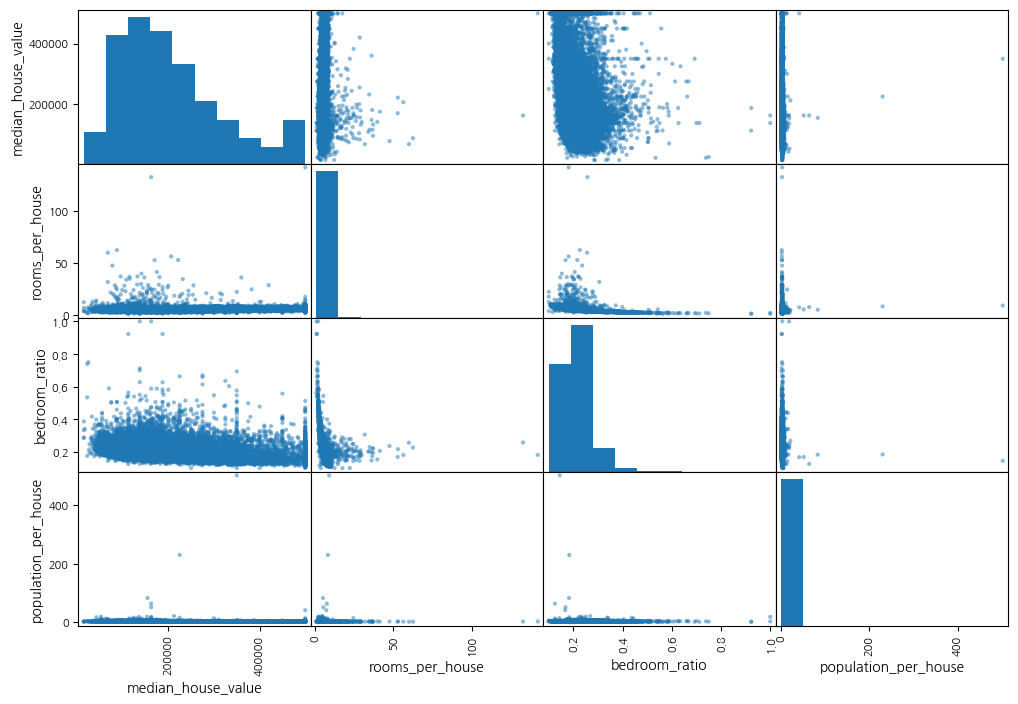

In [107]:
# 상관관계가 높아보이는 feature들만 scatter visualize
attributes = ["median_house_value", "rooms_per_house", "bedroom_ratio", "population_per_house"]
scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()